<img src="pictures/logo_ENESJ.png" width=140 height=120 />

<a href="https://colab.research.google.com/github/ulises1229/Intro-ML-Python/blob/master/code/D%C3%ADa_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Python y aplicaciones en Inteligencia Artificial
## Curso intersemestral enero 2022

---
### Dr. Jesús Emmanuel Solís Pérez
#### jessolisperez@gmail.com
---

# Regresión logística

Los modelos lineales suelen utilizarse para la clasificación. Para ello, consideramos una clasificación binaria utilizando la siguiente ecuación:

$$
 \hat{y} = \beta_{0}\cdot x_{1} + \beta_{1}\cdot x_{2} + \cdots + \beta_{p}\cdot x_{p} + b > 0.
$$

Como podemos observar, se parece mucho a la ecuación de un OLS con la diferencia de que establecemos el umbral del valor predicho en cero. Si la ecuación anterior es menor que cero, predecimos la clase $-1$; si es mayor que cero entonces la clase $+1$.

| Modelo              | Variable objetivo  | Rango variable       |
|:-------------------:|:------------------:|:--------------------:|
| Regresión lineal    | Variable numérica  | (-$\infty$,$\infty$) |
| Regresión logística | Probabilidad clase | $[0,1]$              |

Un clasificador binario separa dos clases utilizando una línea, un plano o un hiperplano. Los dos algoritmos de clasificación lineal más utilizados son: **regresión logística** `linear_model.LogisticRegression` y **máquinas de soporte vectorial lineal** `svm.LinearSVC`.

Al generar una línea, se puede caer en el error de obtener valores distintos de $0$ y $1$. Esto conlleva a que no se estaría cumpliendo la condición de la probabilidad debe estar en el intervalo $[0,1]$.

Para evitar este problema, la regresión logística (Cox, 1958) transforma el valor obtenido por OLS con una función cuyo rango $\in(0,1)$. En la literatura podemos encontrar diversas funciones que cumplen con lo anterior. La más utilizada es la **función logística** o **sigmoide**:

$$
 \varphi(\eta) = \frac{1}{1 + \exp(-\eta)}.
$$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

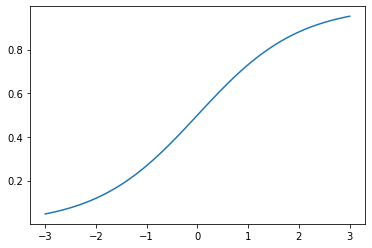

In [ ]:
x = np.linspace(-3,3,100)

logsig = lambda n: 1/(1 + np.exp(-n))

plt.plot(x,logsig(x))

Sustituyendo la ecuación del modelo lineal en la ecuación anterior para obtener:

$$
 P(y=1|X = x) = \frac{\beta_{0}\cdot x_{0} + \beta_{1}\cdot x_{1} + \cdots + \beta_{p}\cdot x_{p} + b}{1 + \exp\left( \beta_{0}\cdot x_{0} + \beta_{1}\cdot x_{1} + \cdots + \beta_{p}\cdot x_{p} + b \right)},
$$

donde $P(y=1|X = x)$ se interpreta como la probabilidad de que $y$ adquiera el valor de $1$, dados los predictores $x_{0},x_{1},\dots,x_{p}$.

Ahora bien, `sklearn` permite trabajar con un modelo de regresión logística con un parámetro de compensación que rige la fuerza de la regularización llamado **C**. Aquí: 

* Si $C\gg$, entonces el modelo intenta ajustarse al conjunto de entrenamiento lo mejor posible.
* Si $C\ll$, entonces el modelo intenta encontrar un vector de coeficientes $\beta$ cercano a cero.

Además, el parámetro C influye de la siguiente manera:

* Si $C<$, entonces los algoritmos intenten ajustarse a la mayor cantidad de datos.
* Si $C>$, entonces los algoritmos tratan de que se clasifiquen correctamente.

El valor por default en `linear_model.LogisticRegression` es $C = 1$ que proporciona un rendimiento bastante aceptable, con una precisión del 95% tanto en el conjunto de entrenamiento como en el de prueba.


---
# Ejemplo 1
Para trabajar el modelo de regresión logística, vamos a utilizar [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)).

En esta base de datos, las características se calculan a partir de una imagen digitalizada de una masa mamaria. 

**Información de los atributos**
1. Número de identificación
2. Diagnóstico (M = maligno, B = benigno)
3-32)

Se calculan diez características de valor real para cada núcleo celular:

* radio (media de las distancias desde el centro hasta los puntos del perímetro)
* textura (desviación estándar de los valores de la escala de grises)
* perímetro
* área
* suavidad (variación local en longitudes de radio)
* compacidad (perímetro ^ 2 / área - 1.0)
* concavidad (severidad de las porciones cóncavas del contorno)
* puntos cóncavos (número de porciones cóncavas del contorno)
* simetría
* dimensión fractal ("aproximación de la línea costera" - 1)

La media, el error estándar y "peor" o mayor (media de los tres valores más grandes) de estas características se calcularon para cada imagen, resultando en 30 funciones. Por ejemplo, el campo 3 es Radio medio, campo 13 es Radio SE, el campo 23 es Peor radio (Dua y Graff, 2019).

Todos los valores de las funciones se recodifican con cuatro dígitos significativos.

Faltan valores de atributo: ninguno

Distribución de clases: 357 benignas, 212 malignas

Una de las imágenes digitalizadas que conforman la base de datos es la siguiente:

<img src="../figs/dataset-card.jpg" width=340 height=180 />

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 1. Carga y regresa el conjunto de datos de Wisconsin de cancer de seno (clasificación)
cancer = load_breast_cancer()

pd.DataFrame(cancer.target).value_counts()

1    357
0    212
dtype: int64

In [ ]:
# Reemplazamos los 0 por 1 y 1 por cero de modo que tenemos las siguientes clases:
# Clase 0: Benignas
# Clase 1: Malignas
pd.DataFrame(cancer['target']).replace({1:0,0:1}, inplace=True)

In [ ]:
pd.DataFrame(cancer.target).value_counts()

0    357
1    212
dtype: int64

In [ ]:
# 2. Preparamos la base de datos para dividirla en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.40, random_state = 1989) # 60% entrenamiento
                                                                                           # 40% prueba

In [ ]:
# 3. Ajustamos el modelo de regresión logística
logreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

# 4. Obtenemos la puntuación del modelo
print('Training score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training score: 0.959
Test score: 0.939


In [ ]:
# 5. Realizamos las predicciones
predicts = logreg.predict(X_test)
predicts[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
# 6. Calculamos las probabilidades de las predicciones
predicts_prob = logreg.predict_proba(X_test)
predicts_prob[:10]

array([[9.92470832e-01, 7.52916769e-03],
       [2.50592828e-05, 9.99974941e-01],
       [5.10702591e-15, 1.00000000e+00],
       [1.06741299e-08, 9.99999989e-01],
       [8.88585618e-01, 1.11414382e-01],
       [6.77874712e-09, 9.99999993e-01],
       [3.98331205e-01, 6.01668795e-01],
       [9.98396803e-01, 1.60319654e-03],
       [9.98131568e-01, 1.86843223e-03],
       [3.52263364e-05, 9.99964774e-01]])

In [ ]:
probs_df = pd.DataFrame(predicts_prob)
probs_df

,0,1
0,9.924708e-01,0.007529
1,2.505928e-05,0.999975
2,5.107026e-15,1.000000
3,1.067413e-08,1.000000
4,8.885856e-01,0.111414
...,...,...
223,6.865542e-02,0.931345
224,9.980006e-01,0.001999
225,9.977885e-01,0.002212
226,9.984828e-01,0.001517


In [ ]:
logreg100 = LogisticRegression(C = 100, solver = 'liblinear').fit(X_train, y_train)

print('Training score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logreg100.score(X_test, y_test)))

Training score: 0.982
Test score: 0.939


In [ ]:
logreg001 = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)

print('Training score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logreg001.score(X_test, y_test)))

Training score: 0.938
Test score: 0.934


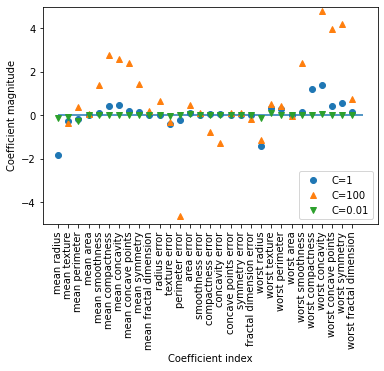

In [ ]:
plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg100.coef_.T, '^', label = 'C=100')
plt.plot(logreg001.coef_.T, 'v', label = 'C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

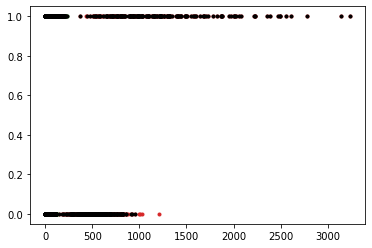

In [ ]:
plt.plot(X_test, y_test, '.')
plt.plot(X_test, predicts, '.k')

---
# Ejemplo 2

Base de datos de diabetes de los Indios Pima del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales

**Información relevante**
* Todos los pacientes son mujeres de al menos 21 años de ascendencia India Pima. 
* Número de instancias: 768
* Número de atributos: 8 más clase

Para cada atributo: (todos con valores numéricos)
1. Número de embarazos (PREG)
2. Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral (HPGC)
3. Presión arterial diastólica (mm Hg) (DBP)
4. Espesor del pliegue cutáneo del tríceps (mm) (TSFT)
5. Insulina sérica de 2 horas (mu U / ml) (HSI)
6. Índice de masa corporal (peso en kg / (altura en m) ^ 2) (BMI)
7. Función del pedigrí de la diabetes (RDP)
8. Edad (años) (AGE)
9. Variable de clase (0 o 1) (CLASS)

Distribución de clases: (el valor de clase 1 se interpreta como "positivo a diabetes")

| Valor de la Clase | Número de instancias |
| :---------------: | :------------------: |
| 0                 | 500                  |
| 1                 | 268                  |


In [ ]:
# 1. Cargamos la base de datos
pima_db = pd.read_csv('pima-indians-diabetes.csv')
pima_db.head()

,PREG,HPGC,DBP,TSFT,HSI,BMI,RDP,AGE,CLASS
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
vars_names = list(pima_db.keys().drop('CLASS'))
pima_db[vars_names]

,PREG,HPGC,DBP,TSFT,HSI,BMI,RDP,AGE
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# 2. Preparamos la base de datos para dividirla en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pima_db[vars_names], pima_db.CLASS,
                                                    test_size = 0.40, random_state = 1989) # 60% entrenamiento
                                                                                           # 40% prueba

In [ ]:
# 3. Ajustamos el modelo de regresión logística
logreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

# 4. Obtenemos la puntuación del modelo
print('Training score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training score: 0.772
Test score: 0.776


In [ ]:
# 5. Realizamos las predicciones
predicts = logreg.predict(X_test)

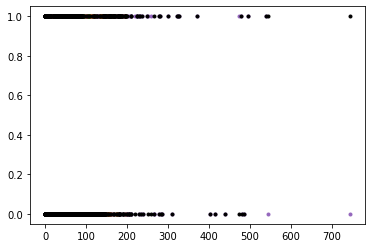

In [ ]:
plt.plot(X_test, y_test, '.')
plt.plot(X_test, predicts, '.k')

---
# Evaluación de modelos de clasificación
Recordemos que un clasificador binario sólo evalúa dos clases: clase $0$ y clase $1$. Para la base de datos de cáncer después de un reemplazo tenemos tenemos:

* _Casos negativos_: Clase $1$ (212 malignas)
* _Casos positivos_: Clase $0$ (357 benignas)

In [ ]:
pd.DataFrame(cancer.target).value_counts()

0    357
1    212
dtype: int64

A partir de lo anterior, tenemos 4 tipos de observaciones:

* **True Positives (TP)**. Masas malignas que se clasifican como malignas.
* **False Positives (FP)**. Masas benignas que se clasifican como malignas.
* **True Negatives (TN)**. Masas malignas que se clasifican como malignas.
* **False Negatives (FN)**. Masas malignas que se clasifican como benignas.

<img src="../figs/TP-FP-FN-TN.png" width=340 heigth=180 />

> Imagen recuperada de Olson et. al (2015)

## Ratios de clasificación

Para poder utilizar los siguientes ratios, es necesaria la siguiente instrucción: `from sklearn import metrics`

* Accuracy (Exactitud)

Mide la cantidad de casos que se han clasificado correctamente a partir de la siguiente ecuación:

$$
 ACC = \frac{TP + TN}{TP + TN + FP + FN} = \frac{\text{Número de observaciones correctamente clasificadas}}{\text{Número de observaciones totales}}.
$$

`metrics.accuracy_score(real_classes, predictions)`

* Precission (Precisión)

Mide la habilidad del modelo para clasificar los casos positivos como positivos:

$$
 PRE = \frac{TP}{TP + FP} = \frac{\text{Número de observaciones positivas correctamente clasificadas}}{\text{Número de observaciones clasificadas como positivas}}.
$$

`metrics.average_precision_score(real_classes, predictions)`

* Sensitivity (Sensibilidad)

Mide la habilidad del modelo para encontrar todos los casos positivos:

$$
 SEN = \frac{TP}{TP + FN} = \frac{\text{Número de observaciones positivas clasificadas como positivas}}{\text{Número de observaciones positivas totales}}
$$

`metrics.recall_score(real_classes, predictions)`

* Matriz de confusión

Una alternativa y sencilla de comparar cómo el modelo ha clasificado cada observación

`from sklearn.metrics import confusion_matrix`

`confusion_matrix(real_classes, predictions)`

* F1 score

Es una medida ponderada entre SEN y ACC:

$$
 F_{1} = 2\cdot \frac{1}{\frac{1}{ACC} + \frac{1}{SEN}} = 2\cdot \frac{ACC\cdot SEN}{ACC + SEN}.
$$

`metrics.f1_score(real_classes, predictions)`

* False Positive Ratio

Es una medida de las probabilidades del modelo para asignar una clase positiva a un caso negativo:

$$
 FPR = \frac{FP}{FP + TN} = \frac{\text{Número de observaciones negativas clasificadas como positivas}}{\text{Número de observaciones negativas}}.
$$

`fpr(real_classes, predictions)`

* Area Under the Curve (ROC-AUC)

Permite encontrar un modelo que optimice la compensación entre FP y TP. El área debajo de la curva nos permite hacer la elección del modelo. Por ejemplo, si el área se encuentra al 100% entonces el modelo es capaz de distinguir entre resultados negativos y positivos la mayor parte del tiempo. Cuanto menor sea el área, peor será la clasificación.

<img src="../figs/ROC.png" />

`metrics.roc_auc_score(real_classes, predictions)`

---
# Evaluación del modelo del Ejemplo 1

In [ ]:
from sklearn import metrics

def eval_model(target, estimations):
    return {
        'ACC': metrics.accuracy_score(target, estimations),
        'PRE': metrics.average_precision_score(target, estimations),
        'SEN': metrics.recall_score(target, estimations),
        'F1': metrics.f1_score(target, estimations),
        'AuC': metrics.roc_auc_score(target, estimations)
    }

In [ ]:
# 2. Preparamos la base de datos para dividirla en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.40, random_state = 1989) # 60% entrenamiento
                                                                                           # 40% prueba
                                                                                           
# 3. Ajustamos el modelo de regresión logística
logreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

# 5. Realizamos las predicciones
predicts_train = logreg.predict(X_train)
predicts_test = logreg.predict(X_test)

In [ ]:
results = {}

In [ ]:
results['train'] = eval_model(y_train,predicts_train)
results['test'] = eval_model(y_test,predicts_test)

In [ ]:
pd.DataFrame(results)

,train,test
ACC,0.958944,0.938596
PRE,0.911165,0.881196
SEN,0.934426,0.922222
F1,0.942149,0.922222
AuC,0.953514,0.935749


Recordando

<img src="../figs/TP-FP-FN-TN.png" width=340 heigth=180 />

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,predicts_train)

array([[213,   6],
       [  8, 114]])

In [ ]:
confusion_matrix(y_test,predicts_test)

array([[131,   7],
       [  7,  83]])

---
# Práctica en clase
Evaluación del modelo del Ejemplo 2

---
# Referencias
* Cox, D. R. (1958). The regression analysis of binary sequences. Journal of the Royal Statistical Society: Series B (Methodological), 20(2), 215-232.
* Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.
* Olson, N. D., Lund, S. P., Colman, R. E., Foster, J. T., Sahl, J. W., Schupp, J. M., ... & Zook, J. M. (2015). Best practices for evaluating single nucleotide variant calling methods for microbial genomics. Frontiers in genetics, 6, 235.